In [1]:
# HW 1
# Name: Shaily Shah
# Andrew ID: shailys

import pandas as pd
import numpy as np
import statistics as stat
%matplotlib inline
import matplotlib.pyplot as plt

#Part 1 : Understand the Data
clv_data = pd.read_csv("HW1 clv_transactions.csv", sep = ",", index_col='TransactionID')
print(clv_data)
print(clv_data.dtypes)

              TransactionDate  CustomerID  Amount
TransactionID                                    
1                    9/4/2012           1   20.26
2                   5/15/2012           2   10.87
3                   5/23/2014           2    2.21
4                  10/24/2014           2   10.48
5                  10/13/2012           2    3.94
...                       ...         ...     ...
4182                6/23/2013        1000    3.86
4183                 8/7/2011        1000    4.00
4184                10/7/2012        1000   18.37
4185                 1/9/2014        1000    3.45
4186                4/30/2011        1000    5.18

[4186 rows x 3 columns]
TransactionDate     object
CustomerID           int64
Amount             float64
dtype: object


In [2]:
# 1. Check for missing values
print(clv_data.isnull().sum()) 
print(clv_data.isna().sum().sum())
print(clv_data.isna().any().any())
# There are no null values or missing values in the data. 

TransactionDate    0
CustomerID         0
Amount             0
dtype: int64
0
False


In [3]:
# 2. Convert TransactionDate from object to datetime type without the timestamp and Check date range
clv_data['Date'] = pd.to_datetime(clv_data['TransactionDate']).dt.date
clv_data['Year'] = pd.to_datetime(clv_data['TransactionDate']).dt.year

minDate = (clv_data['Date']).min()
maxDate = (clv_data['Date']).max()
print('The dates range from',minDate,'to',maxDate,'which is about a 5 year range.')

The dates range from 2010-01-04 to 2015-12-31 which is about a 5 year range.


In [4]:
# 3. Number of Unique Customers 
print("Number of Unique Customers in database: ", clv_data['CustomerID'].nunique())

Number of Unique Customers in database:  1000


In [5]:
# 4. Summary Stats for Amount field
print(clv_data.agg({"Amount": ["min", "max", "mean", "std", "var"]}))

# The min is a negative value which seems wrong and the max is very high for having a very low mean.

           Amount
min     -1.000000
max   2033.000000
mean     9.028082
std     38.723909
var   1499.541111


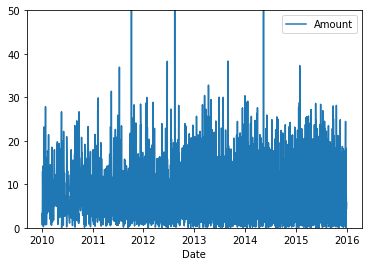

In [6]:
# 5. Look for inflation in Amount field
#clv_data.sort_values(by=['TransactionDate'])
clv_data.plot(x='Date',y='Amount')
plt.ylim([0,50])
plt.show()

# There seems to be a slight increase in amount from 2011 to 2014 but not really a trend present in the Amount field.

In [7]:
# Looking at all customers who have amounts higher than 30 to see if it is the same customer. 
# 3 amounts are extremely high and seem like a mistake or data quality issue.
print(clv_data[clv_data.Amount >= 50])

# 2 amounts are below 0 which is not possible for a transaction as values should be positive.
print(clv_data[clv_data.Amount < 0])

              TransactionDate  CustomerID  Amount        Date  Year
TransactionID                                                      
24                  10/7/2011           7  1003.0  2011-10-07  2011
212                 5/14/2014          54  1027.0  2014-05-14  2014
4178                8/13/2012        1000  2033.0  2012-08-13  2012
              TransactionDate  CustomerID  Amount        Date  Year
TransactionID                                                      
50                  5/12/2012          13    -1.0  2012-05-12  2012
3327                1/16/2014         811    -1.0  2014-01-16  2014


<AxesSubplot:>

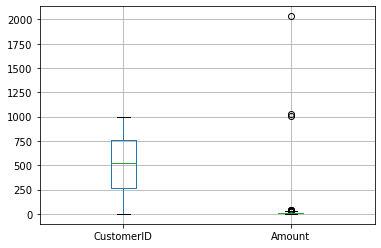

In [8]:
# Part 2 : Explore the Dataset

#Checking for outliers
clv_data.boxplot(['CustomerID','Amount'])

In [9]:
# There seem to be abnormal amounts such as values above 100 and below 0. 
# 1. According to the histogram, 98% of the data has amounts lower than 100. So those values are the extreme outliers.

<AxesSubplot:ylabel='Frequency'>

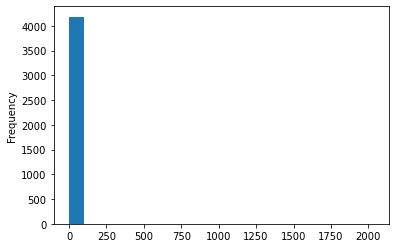

In [10]:
clv_data['Amount'].plot.hist(bins=20)

In [11]:
# for x in ['Amount']:
#     q75,q25 = np.percentile(clv_data.loc[:,x],[75,25])
#     intr_qr = q75-q25
 
#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)
    
#     if min < 0:
#         min = 0
        
#     print('Min:', min)
#     print('Max:', max)
 
#     clv_data.loc[clv_data[x] < min,x] = np.nan
#     clv_data.loc[clv_data[x] > max,x] = np.nan

Number of Outliers in the Data:
--------------------------------
TransactionDate    0
CustomerID         0
Amount             5
Date               0
Year               0
dtype: int64

Number of Outliers in the Data after removal:
--------------------------------
TransactionDate    0
CustomerID         0
Amount             0
Date               0
Year               0
dtype: int64


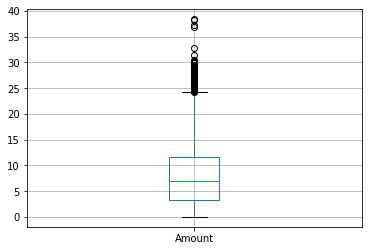

In [12]:
# 2. Treat outliers by changing their amount values to NA and dropping all NA values from the dataset.

#Replace outliers with NA values
for x in ['Amount']:
    min = 0
    max = 100
    clv_data.loc[clv_data[x] < min,x] = np.nan
    clv_data.loc[clv_data[x] > max,x] = np.nan 

#checking to see how many outliers there are in the data - 5 outliers
print("Number of Outliers in the Data:")
print("--------------------------------")
print(clv_data.isnull().sum())
clv_data.boxplot(['Amount'])

#Remove outliers since its less than 1% of data values
print("\nNumber of Outliers in the Data after removal:")
print("--------------------------------")
clv_data = clv_data.dropna(axis=0)
print(clv_data.isnull().sum())

In [13]:
# Part 3: Origin year of all customers
customer_origin_year = clv_data.groupby(['CustomerID']).agg({'Year': 'min'})
customer_origin_dict = customer_origin_year.to_dict()
customer_origin_year.rename(columns = {'Year':'Origin_Year'}, inplace = True)

#makes easier to use dict for Step 4
customer_origin = {}
for x,y in customer_origin_dict.items():
    for i,j in y.items():
        customer_origin[i] = j

customer_origin_year

,Origin_Year
CustomerID,
1,2012
2,2012
3,2012
4,2015
5,2015
...,...
996,2012
997,2014
998,2010


In [19]:
# Part 4: Calculate cumulative transaction amounts

cumulative_Amounts_yearly_perCustomer = clv_data.groupby(['Year','CustomerID'])["Amount"].sum().to_dict()

customersID_2010 = []
customersID_2011 = []
customersID_2012 = []
customersID_2013 = []
customersID_2014 = []
customersID_2015 = []

for x,y in customer_origin.items():
    if y == 2015:
        customersID_2015.append(x)
    elif y == 2014:
        customersID_2014.append(x)
    elif y== 2013:
        customersID_2013.append(x)
    elif y == 2012:
        customersID_2012.append(x)
    elif y == 2011:
        customersID_2011.append(x)
    else:
        customersID_2010.append(x)
trans_amt = {}
cum12,cum24,cum36,cum48,cum60,cum72=0,0,0,0,0,0

#calculating original sum amount for each year for new customers only
for x,y in cumulative_Amounts_yearly_perCustomer.items():
    i,j = x[0],x[1]
    if j in customersID_2010:
        if i <= 2015:
            cum72+=y
        if i <= 2014:
            cum60+=y
        if i <= 2013:
            cum48+=y    
        if i <= 2012:
            cum36+=y
        if i <= 2011:
            cum24+=y
        if i <= 2010:
            cum12+=y
trans_amt['2010-01-01 - 2010-12-31'] = [cum12,cum24,cum36,cum48,cum60,cum72]

cum12,cum24,cum36,cum48,cum60,cum72=0,0,0,0,0,0
for x,y in cumulative_Amounts_yearly_perCustomer.items():
    i,j = x[0],x[1]
    if j in customersID_2011:
        if i <= 2015:
            cum60+=y
        if i <= 2014:
            cum48+=y
        if i <= 2013:
            cum36+=y    
        if i <= 2012:
            cum24+=y
        if i <= 2011:
            cum12+=y
trans_amt['2011-01-01 - 2011-12-31'] = [cum12,cum24,cum36,cum48,cum60,cum72]
            
cum12,cum24,cum36,cum48,cum60,cum72=0,0,0,0,0,0
for x,y in cumulative_Amounts_yearly_perCustomer.items():
    i,j = x[0],x[1]
    if j in customersID_2012:
        if i <= 2015:
            cum48+=y
        if i <= 2014:
            cum36+=y
        if i <= 2013:
            cum24+=y    
        if i <= 2012:
            cum12+=y
trans_amt['2012-01-01 - 2012-12-31'] = [cum12,cum24,cum36,cum48,cum60,cum72]

cum12,cum24,cum36,cum48,cum60,cum72=0,0,0,0,0,0
for x,y in cumulative_Amounts_yearly_perCustomer.items():
    i,j = x[0],x[1]
    if j in customersID_2013:
        if i <= 2015:
            cum36+=y
        if i <= 2014:
            cum24+=y
        if i <= 2013:
            cum12+=y    
trans_amt['2013-01-01 - 2013-12-31'] = [cum12,cum24,cum36,cum48,cum60,cum72]

cum12,cum24,cum36,cum48,cum60,cum72=0,0,0,0,0,0
for x,y in cumulative_Amounts_yearly_perCustomer.items():
    i,j = x[0],x[1]
    if j in customersID_2014:
        if i <= 2015:
            cum24+=y
        if i <= 2014:
            cum12+=y
trans_amt['2014-01-01 - 2014-12-31'] = [cum12,cum24,cum36,cum48,cum60,cum72]

cum12,cum24,cum36,cum48,cum60,cum72=0,0,0,0,0,0
for x,y in cumulative_Amounts_yearly_perCustomer.items():
    i,j = x[0],x[1]
    if j in customersID_2015:
        if i <= 2015:
            cum12+=y

trans_amt['2015-01-01 - 2015-12-31'] = [cum12,cum24,cum36,cum48,cum60,cum72]           

# print(cum12,cum24,cum36,cum48,cum60,cum72)
amount = pd.DataFrame(trans_amt,).from_dict(trans_amt,orient='index')
amount = amount.rename(columns={0:'12', 1:'24',2:'36', 3:'48', 4:'60',5:'72'})
amount.index.name = 'Origin'
amount

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
2011-01-01 - 2011-12-31,2238.46,3757.90,5465.99,6703.11,7862.24,0.00
2012-01-01 - 2012-12-31,2181.35,3874.69,5226.86,6501.85,0.00,0.00
2013-01-01 - 2013-12-31,2179.85,3609.81,5227.75,0.00,0.00,0.00
2014-01-01 - 2014-12-31,1830.85,3262.05,0.00,0.00,0.00,0.00
2015-01-01 - 2015-12-31,1912.17,0.00,0.00,0.00,0.00,0.00


In [15]:
# Step 5: Number of new customers by origin year in each year
cust2010,cust2011,cust2012,cust2013,cust2014,cust2015=0,0,0,0,0,0 
for x,y in cumulative_Amounts_yearly_perCustomer.items():
    i,j = x[0],x[1]
    for k,l in customer_origin.items():
        if ((i == 2010) and (j==k) and (i==l)):
            cust2010+=1 
        if ((i == 2011) and (j==k) and (i==l)):
            cust2011+=1
        if ((i == 2012) and (j==k) and (i==l)):
            cust2012+=1
        if ((i == 2013) and (j==k) and (i==l)):
            cust2013+=1
        if ((i == 2014) and (j==k) and (i==l)):
            cust2014+=1
        if ((i == 2015) and (j==k) and (i==l)):
            cust2015+=1
cust_amt = {'2010-01-01 - 2010-12-31': [cust2010,cust2010,cust2010,cust2010,cust2010,cust2010], 
                  '2011-01-01 - 2011-12-31':[cust2011,cust2011,cust2011,cust2011,cust2011,0], 
                  '2012-01-01 - 2012-12-31':[cust2012,cust2012,cust2012,cust2012,0,0],
                  '2013-01-01 - 2013-12-31':[cust2013,cust2013,cust2013,0,0,0],
                  '2014-01-01 - 2014-12-31':[cust2014,cust2014,0,0,0,0],
                  '2015-01-01 - 2015-12-31':[cust2015,0,0,0,0,0]}
newCustomers = pd.DataFrame(cust_amt).from_dict(cust_amt,orient='index')
newCustomers = newCustomers.rename(columns={0:'12', 1:'24',2:'36', 3:'48', 4:'60',5:'72'})
newCustomers.index.name = 'Origin'
newCustomers

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,172,172,172,172,172,172
2011-01-01 - 2011-12-31,170,170,170,170,170,0
2012-01-01 - 2012-12-31,163,163,163,163,0,0
2013-01-01 - 2013-12-31,180,180,180,0,0,0
2014-01-01 - 2014-12-31,155,155,0,0,0,0
2015-01-01 - 2015-12-31,160,0,0,0,0,0


In [20]:
# Step 6: Calculate Historic CLV
# annual measurements of the cumulative amount spent per customer in each group of annually acquired customers
spent per customer in each group of annually acquired customers
CLV = amount.div(newCustomers)
CLV

,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,13.137616,21.016163,30.667500,38.560291,46.108663,52.119128
2011-01-01 - 2011-12-31,13.167412,22.105294,32.152882,39.430059,46.248471,NaN
2012-01-01 - 2012-12-31,13.382515,23.771104,32.066626,39.888650,NaN,NaN
2013-01-01 - 2013-12-31,12.110278,20.054500,29.043056,NaN,NaN,NaN
2014-01-01 - 2014-12-31,11.811935,21.045484,NaN,NaN,NaN,NaN
2015-01-01 - 2015-12-31,11.951063,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Historic CLV')

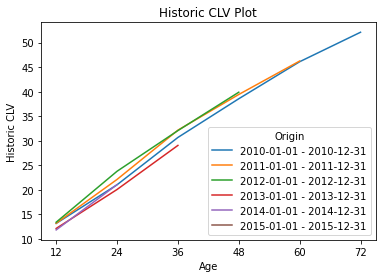

In [24]:
CLV.transpose().plot.line()
plt.title('Historic CLV Plot')
plt.xlabel('Age')
plt.ylabel('Historic CLV')

In [35]:
i=12
single_CLV={}
for x in CLV.iteritems():
    single_CLV[i]=x[1].mean()
    i+=12
    
pd.DataFrame(list(single_CLV.items()),columns = ['Age','HistoricCLV'])

,Age,HistoricCLV
0,12,12.593470
1,24,21.598509
2,36,30.982516
3,48,39.293000
4,60,46.178567
5,72,52.119128


In [ ]:
# Step 7: Interpreting your results
# Historic CLV chart shows the average annual measurements of the cumulative amount spent for all groups depending
# on customes' age. 

#Customers acquired in 2011 have spent about $7862.24 to date if you refer to step 5 chart.
#Each group seems to exhibit a similar Historic CLV line. The implication behind this maybe that new customers tend
# have less annual measurements compared to customers with a longer age. So long-standing consumers spend more frequently
# compared to short-standing customers.